In [7]:
! pip install pandas

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [8]:
import pandas as pd

### Merging 12 months of sales data into a single file

In [9]:
from IPython.core.magic import register_cell_magic
from IPython.display import HTML, display

@register_cell_magic
def bgc(color, cell=None):
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)

    display(HTML('<img src onerror="{}">'.format(script)))

In [10]:
import os

# Specify the directory containing your CSV files
directory = 'Sales_Data/'

# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

csv_files


['merged_file.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [11]:

# Read each CSV file and concatenate them into a single DataFrame
dfs = [pd.read_csv(os.path.join(directory, file)) for file in csv_files]
merged_df = pd.concat(dfs, ignore_index=True)

# Export the merged DataFrame to a CSV file
merged_df.to_csv(directory+'merged_file.csv', index=False)
print(merged_df)

        Order ID                 Product Quantity Ordered Price Each  \
0         295665      Macbook Pro Laptop                1       1700   
1         295666      LG Washing Machine                1      600.0   
2         295667    USB-C Charging Cable                1      11.95   
3         295668        27in FHD Monitor                1     149.99   
4         295669    USB-C Charging Cable                1      11.95   
...          ...                     ...              ...        ...   
1307945   259353  AAA Batteries (4-pack)                3       2.99   
1307946   259354                  iPhone                1        700   
1307947   259355                  iPhone                1        700   
1307948   259356  34in Ultrawide Monitor                1     379.99   
1307949   259357    USB-C Charging Cable                1      11.95   

             Order Date                         Purchase Address  
0        12/30/19 00:01   136 Church St, New York City, NY 10001  
1

In [12]:
dfs = [pd.read_csv(os.path.join(directory, file)) for file in csv_files]
type([x for x in dfs])

list

In [13]:
merged_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
1307945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
1307946,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
1307947,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
1307948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [14]:
#[x for x in merged_df if x['Order ID'] == 176558]
merged_df[merged_df['Order ID'] == '295665']

print(merged_df['Order ID'].dtypes)

object


##### Q1 What was the best month for sales? How much was earned that month?

In [15]:
#max(int(x) for x in merged_df['Order ID',skiprows=1])
#merged_df['Order ID'] = pd.to_numeric(merged_df['Order ID'], errors='coerce')

#max_order_id_row = merged_df[merged_df['Price Each'] == merged_df['Order ID'].max()]

merged_df.dropna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
1307945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
1307946,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
1307947,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
1307948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [16]:
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], errors='coerce')

C:\Users\zsombor.veres-lakos\AppData\Local\Temp\ipykernel_40176\1338565842.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], errors='coerce')


In [17]:
merged_df['Month'] = merged_df['Order Date'].dt.to_period('M')


merged_df['Month']

0          2019-12
1          2019-12
2          2019-12
3          2019-12
4          2019-12
            ...   
1307945    2019-09
1307946    2019-09
1307947    2019-09
1307948    2019-09
1307949    2019-09
Name: Month, Length: 1307950, dtype: period[M]

In [18]:
merged_df['Brutto'] = pd.to_numeric(merged_df['Price Each'], errors='coerce') * pd.to_numeric(merged_df['Quantity Ordered'], errors='coerce')



In [19]:

monthly_sales = merged_df.groupby('Month')['Brutto'].sum()



print(monthly_sales.idxmax())


2019-12


In [20]:
merged_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Brutto
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12,1700.00
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12,11.95
...,...,...,...,...,...,...,...,...
1307945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019-09,8.97
1307946,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019-09,700.00
1307947,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019-09,700.00
1307948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019-09,379.99


In [21]:
import matplotlib.pyplot as plt

# Convert index to datetime dtype
monthly_sales.index = monthly_sales.index.to_timestamp()




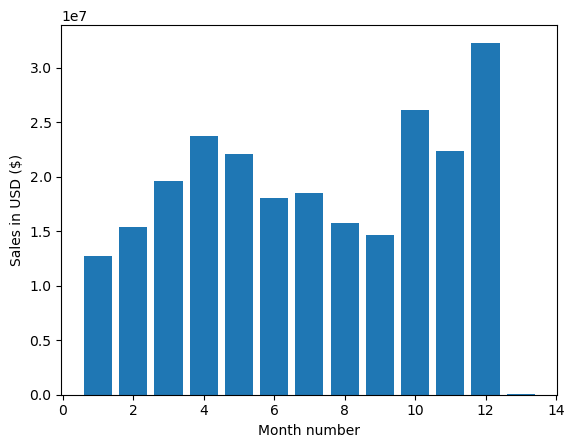

In [22]:
# Extracting data from the monthly_sales Series
months = monthly_sales.index
sales = monthly_sales.values

# Creating the bar chart
plt.bar(range(1,14), sales, width=0.8)  # Adjust the width parameter

plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


##### Axis example:

In [23]:
import pandas as pd

# Create the DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, None, 9]})
print(df)
print()
# Sum along axis=0 (rows)
sum_row = df.sum(axis=0)
print("Sum along rows (axis=0):\n", sum_row)

# Sum along axis=1 (columns)
sum_column = df.sum(axis=1)
print("\nSum along columns (axis=1):\n", sum_column)


print(df.isna().any(axis=1))

   A  B    C
0  1  4  7.0
1  2  5  NaN
2  3  6  9.0

Sum along rows (axis=0):
 A     6.0
B    15.0
C    16.0
dtype: float64

Sum along columns (axis=1):
 0    12.0
1     7.0
2    18.0
dtype: float64
0    False
1     True
2    False
dtype: bool


##### Cleaning up from the video:

In [24]:
len(merged_df)
#nan_df = merged_df[.any(axis)]

nan_df = merged_df[merged_df.isna().any(axis=1)]
display(nan_df.head())

merged_df=merged_df.dropna(how='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Brutto
254,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaT,NaN
264,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
648,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
680,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
705,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaT,NaN


##### Q2: What city had the highest number of sales

In [25]:
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Brutto
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12,1700.00
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12,11.95


In [26]:
! "C:\Users\zsombor.veres-lakos\AppData\Local\anaconda3\Scripts\pip.exe" install usaddress


In [27]:
! pip install random2

In [28]:
import random2


In [44]:
import usaddress

cities = usaddress.tag(merged_df['Purchase Address'].iloc[0])[0]['PlaceName']
test =merged_df.iloc[0:10]['Purchase Address'].apply(lambda x: usaddress.tag(x))
print(test.get(0))

merged_df['TEST2'] =merged_df['Purchase Address'].apply(lambda x: usaddress.tag(x)[0].get('PlaceName'))


(OrderedDict([('AddressNumber', '136'), ('StreetName', 'Church'), ('StreetNamePostType', 'St'), ('PlaceName', 'New York City'), ('StateName', 'NY'), ('ZipCode', '10001')]), 'Street Address')


KeyboardInterrupt: 

In [45]:
merged_df['City'] = merged_df['TEST2']

C:\Users\zsombor.veres-lakos\AppData\Local\Temp\ipykernel_40176\1894141480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['City'] = merged_df['TEST2']


In [46]:
merged_df['City']

0          New York City
1          New York City
2          New York City
3          San Francisco
4                Atlanta
               ...      
1307945      Los Angeles
1307946    San Francisco
1307947    San Francisco
1307948    San Francisco
1307949    San Francisco
Name: City, Length: 1304135, dtype: object

In [73]:
groupBy = merged_df.groupby('City').sum('Brutto')

groupBy.loc[groupBy.idxmax()]


array([19568490.06, 12737072.25, 25631494.07, 19375827.8 , 38167995.6 ,
       32650222.01, 16243434.27, 57835427.37, 19234288.36])

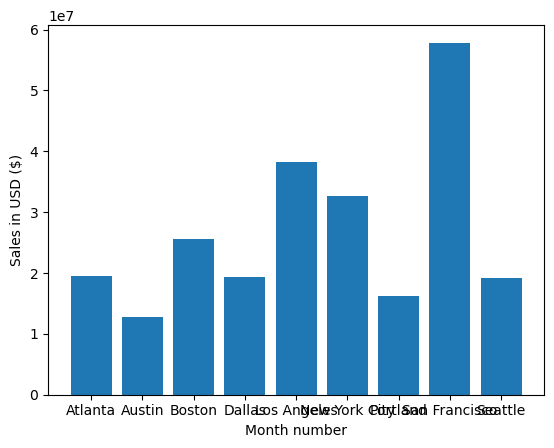

In [74]:
plt.bar(groupBy.index, groupBy.values.flatten(), width=0.8)  # Adjust the width parameter

plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [ ]:
merged_df['Cities']

filtered_df = merged_df[merged_df['Cities'] != 'New York City']
filtered_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Brutto,Cities
